In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve  
from sklearn.metrics import roc_auc_score 
from sklearn import metrics
from sklearn.model_selection import cross_val_score

In [2]:
#Read Data and Split Data
merged = pd.read_csv('/Users/nadadalloul/Documents/AMHA/merged_data.csv')
data = merged[pd.isnull(merged.LAHCA17) == False] 
listeh = open('/Users/nadadalloul/Documents/AMHA/lahca17var.txt', 'r').read().upper().split('\n')
depressed = data[listeh]
y = [1 if depressed.LAHCA17[i] == 1 else 0 for i in depressed.index.values]
depressed = depressed.drop(columns = 'LAHCA17', axis = 1).replace([7, 8], 9).fillna(9)
depressed.index =  range(len(depressed.index))
x_train, x_test, y_train, y_test = train_test_split(depressed, y, test_size=0.25, random_state=0)

In [3]:
#Encoding
enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_train)
x_train_oh = enc.transform(x_train)
x_test_oh = enc.transform(x_test)
x_oh = enc.transform(depressed)

In [4]:
#Cross Validation 10Fold
#Logistic Regression
LogReg = LogisticRegression()
cross_val_score(LogReg, x_oh, y, cv=10, scoring='accuracy').mean()

#Random forest
rf = RandomForestClassifier()
cross_val_score(rf, x_oh, y, cv=10, scoring='accuracy').mean()

/Users/nadadalloul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nadadalloul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nadadalloul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nadadalloul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/Users/nadadalloul/anaconda3/lib/python3.7/si

0.8618776455750092

In [5]:
#Logistic Regression
LogReg.fit(x_train_oh, y_train)
predictions = LogReg.predict(x_test_oh)
score = LogReg.score(x_test_oh, y_test)


#Random forest
rf = RandomForestClassifier()
rf.fit(x_train_oh, y_train)
rfpredictions = rf.predict(x_test_oh)
rfscore = rf.score(x_test_oh, y_test)

/Users/nadadalloul/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/nadadalloul/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


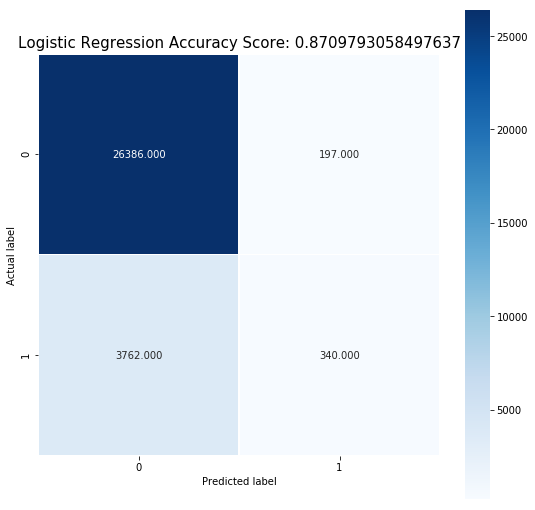

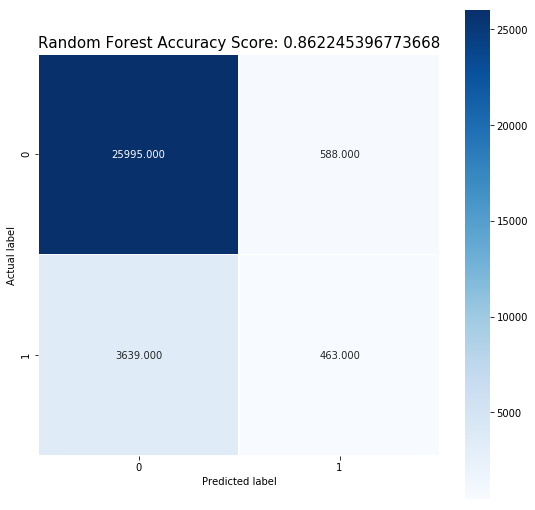

In [8]:
#Confusion Matrices
#Logistic Regression
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True,  cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);
plt.show()
                              
#Random Forest
rfcm = metrics.confusion_matrix(y_test, rfpredictions)
plt.figure(figsize=(9,9))
sns.heatmap(rfcm, annot=True, fmt=".3f", linewidths=.5, square = True,  cmap = 'Blues');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Random Forest Accuracy Score: {0}'.format(rfscore)
plt.title(all_sample_title, size = 15);

LR AUC: 0.738535
RF AUC: 0.715397


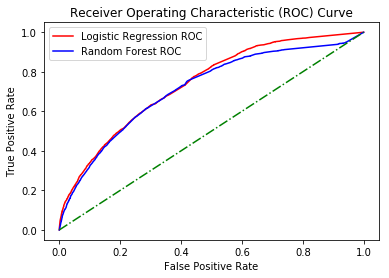

In [13]:
#ROC CURVE
def plot_roc_curve(fpr, tpr, rffpr, rftpr):  
    plt.plot(fpr, tpr, color='red', label='Logistic Regression ROC')
    plt.plot(rffpr, rftpr, color='blue', label='Random Forest ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='dashdot')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


#Logistic Regression
pro = LogReg.predict_proba(x_test_oh)  
prob = pro[:, 1]  

auc = roc_auc_score(y_test, prob)  
print('LR AUC: %f' % auc)  
fpr, tpr, thresholds = roc_curve(y_test, prob)  

#Random Forest
rfpro = rf.predict_proba(x_test_oh)  
rfprob = rfpro[:, 1]  

rfauc = roc_auc_score(y_test, rfprob)  
print('RF AUC: %f' % rfauc)  
rffpr, rftpr, thresholds = roc_curve(y_test, rfprob)  

plot_roc_curve(fpr, tpr, rffpr, rftpr) 